In [ ]:
"""
Purpose: To implement hoemwork 1 problems for ELEC 479/578

Helpful links: 
http://www.neural.cz/dataset-exploration-boston-house-pricing.html

Installations required 
"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/machine_learning/")

In [3]:
import sklearn
from sklearn.datasets import load_boston

In [4]:
import sklearn_utils as sku
import pandas_ml as pml

# Problem 1

In [5]:
#loading the dataset (alreaady drops nan falues)
target_name = "MEDV"
df_raw = sku.load_boston()
df_raw

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Preliminary analysis of Data

In [6]:
pml.df_column_summaries(df_raw)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
pml.correlations_to_target(df_raw,target_name = "MEDV")

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='MEDV'>

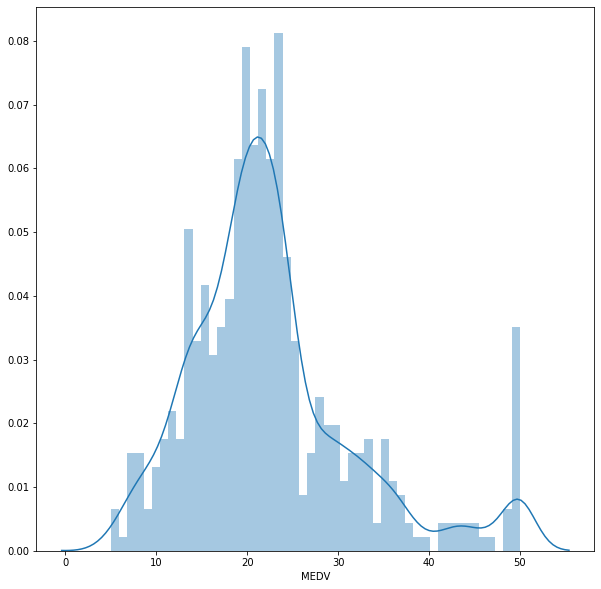

In [8]:
import seaborn_ml as sml
sml.hist(df_raw[target_name])

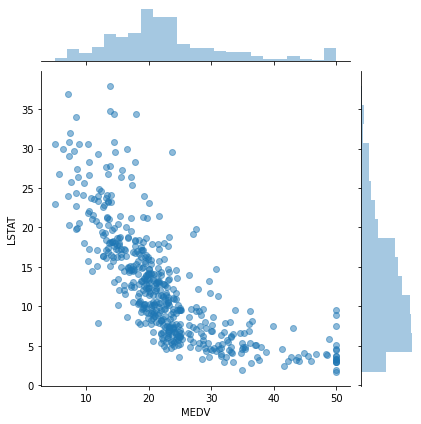

In [9]:
sml.scatter_2D(df_raw[target_name],df_raw["LSTAT"])

# Centering and Normalizing the Data

In [18]:
normalize_data = False
center_data = True

df = pml.preprocess_df(df_raw,
                      center = center_data,
                      normalize = normalize_data)

# a) Part A: What are the most important features

# ai) Comparing the top features

In [11]:
"""
Purpose: Run the following algorithms on the dataset and compare
and contrast the following features

• Statistical significance in Linear Regression.
• Best Subsets.
• Step-wise approaches (and/or Recursive Feature Elimination).
• Lasso.
• Elastic Net.
• Adaptive Lasso.

"""

'\nPurpose: Run the following algorithms on the dataset and compare\nand contrast the following features\n\n• Statistical significance in Linear Regression.\n• Best Subsets.\n• Step-wise approaches (and/or Recursive Feature Elimination).\n• Lasso.\n• Elastic Net.\n• Adaptive Lasso.\n\n'

In [68]:
n_featuers = pml.n_features(df,target_name=target_name)
print(f"n_featuers = {n_featuers}")

n_featuers = 13


# ai) linear regression

In [12]:
# linear regression ()
"""
https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

"""
import statsmodels_utils as smu
smu.linear_regression(df,
                     target_name = target_name,
                     add_intercept = False,
                     )

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              108.3
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                   3.46e-135
Time:                        04:21:30   Log-Likelihood:                         -1498.8
No. Observations:                 506   AIC:                                      3024.
Df Residuals:                     493   BIC:                                      3079.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
"""
Observations: the coefficients that have
a) p value < 0.o5
b) large coefficient

CHAS
NOX
RM
DIS
PTRATIO

"""

'\nObservations: the coefficients that have\na) p value < 0.o5\nb) large coefficient\n\nCHAS\nNOX\nRM\nDIS\nPTRATIO\n\n'

# ai) Best Subsets (Manual Implementation)

In [55]:
import sklearn_models as sklm
import feature_selection_utils as fsu

In [60]:
n_featuers = pml.n_features(df,target_name=target_name)
best_features_over_k = []

for k in range(1,n_featuers+1):
    for eval_method in fsu.all_evaluation_methods:
        curr_best = fsu.best_subset_k(
        df,
        k = k,
        target_name = target_name,
        model = sklm.LinearRegression(),
        evaluation_method = eval_method,
        verbose = False,
        )
        best_features_over_k.append(dict(k = k,
                                   evaluation_method = eval_method,
                                   best_subset = curr_best))
        
import pandas as pd
manual_df = pd.DataFrame.from_records(best_features_over_k)
manual_df.query("evaluation_method == 'R_squared'")

,k,evaluation_method,best_subset
0,1,R_squared,"(LSTAT,)"
2,2,R_squared,"(RM, LSTAT)"
4,3,R_squared,"(RM, PTRATIO, LSTAT)"
6,4,R_squared,"(RM, DIS, PTRATIO, LSTAT)"
8,5,R_squared,"(NOX, RM, DIS, PTRATIO, LSTAT)"
10,6,R_squared,"(CHAS, NOX, RM, DIS, PTRATIO, LSTAT)"
12,7,R_squared,"(CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"
14,8,R_squared,"(ZN, CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"
16,9,R_squared,"(CRIM, CHAS, NOX, RM, DIS, RAD, PTRATIO, B, LS..."
18,10,R_squared,"(CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B,..."


In [159]:
import pandas as pd
pd.set_option("display.max_colwidth",1000)
manual_df.query("evaluation_method == 'MSE'")

,k,evaluation_method,best_subset
1,1,MSE,"(CHAS,)"
3,2,MSE,"(CHAS, DIS)"
5,3,MSE,"(ZN, CHAS, DIS)"
7,4,MSE,"(CRIM, DIS, RAD, B)"
9,5,MSE,"(CRIM, CHAS, DIS, RAD, B)"
11,6,MSE,"(CRIM, ZN, NOX, AGE, RAD, B)"
13,7,MSE,"(CRIM, ZN, INDUS, NOX, AGE, RAD, B)"
15,8,MSE,"(CRIM, ZN, INDUS, NOX, AGE, RAD, TAX, B)"
17,9,MSE,"(CRIM, ZN, INDUS, CHAS, NOX, AGE, RAD, TAX, B)"
19,10,MSE,"(CRIM, ZN, INDUS, CHAS, NOX, AGE, DIS, RAD, TAX, B)"


# ai) Best Subsets (sklearn) -- 

In [52]:
from tqdm.notebook import tqdm

In [62]:
"""
Note: This method uses a the following evaluation criteria for best feature
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

1) The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
2) It is converted to an F score then to a p-value.

"""
best_features_over_sk = []

for k in tqdm(range(1,n_featuers+1)):
    eval_method = "sklearn"
    
    curr_best = fsu.best_subset_k_individual_sklearn(
    df,
    k = k,
    target_name = target_name,
    verbose = False,
    )
    best_features_over_sk.append(dict(k = k,
                               evaluation_method = eval_method,
                               best_subset = curr_best))
        
import pandas as pd
print(f"Using sklearn method")
pd.DataFrame.from_records(best_features_over_sk)

  0%|          | 0/13 [00:00<?, ?it/s]

Using sklearn method


,k,evaluation_method,best_subset
0,1,sklearn,[LSTAT]
1,2,sklearn,"[RM, LSTAT]"
2,3,sklearn,"[RM, PTRATIO, LSTAT]"
3,4,sklearn,"[INDUS, RM, PTRATIO, LSTAT]"
4,5,sklearn,"[INDUS, RM, TAX, PTRATIO, LSTAT]"
5,6,sklearn,"[INDUS, NOX, RM, TAX, PTRATIO, LSTAT]"
6,7,sklearn,"[CRIM, INDUS, NOX, RM, TAX, PTRATIO, LSTAT]"
7,8,sklearn,"[CRIM, INDUS, NOX, RM, RAD, TAX, PTRATIO, LSTAT]"
8,9,sklearn,"[CRIM, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT]"
9,10,sklearn,"[CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT]"


# ai) Forward Stepwise Selection

# ai) Reverse Feature Elimination

In [ ]:
"""
Notes: The feature importance is determined by the absolute value of the .coef_

"""

In [91]:
import sklearn.feature_selection as fs

X,y  = pml.X_y(df,target_name)
best_features_RFE = []

for k in tqdm(range(1,n_featuers+1)):
    eval_method = "RFE"
    curr_best = fsu.reverse_feature_elimination(df,
                                   k = k,
                                   model = sklm.LinearRegression(),
                                   target_name = target_name,
                                    verbose= False)
    
    best_features_RFE.append(dict(k = k,
                               evaluation_method = eval_method,
                               best_subset = curr_best))
    
import pandas as pd
print(f"RFE:")
pd.DataFrame.from_records(best_features_RFE)

  0%|          | 0/13 [00:00<?, ?it/s]

RFE:


,k,evaluation_method,best_subset
0,1,RFE,[NOX]
1,2,RFE,"[NOX, RM]"
2,3,RFE,"[CHAS, NOX, RM]"
3,4,RFE,"[CHAS, NOX, RM, PTRATIO]"
4,5,RFE,"[CHAS, NOX, RM, DIS, PTRATIO]"
5,6,RFE,"[CHAS, NOX, RM, DIS, PTRATIO, LSTAT]"
6,7,RFE,"[CHAS, NOX, RM, DIS, RAD, PTRATIO, LSTAT]"
7,8,RFE,"[CRIM, CHAS, NOX, RM, DIS, RAD, PTRATIO, LSTAT]"
8,9,RFE,"[CRIM, INDUS, CHAS, NOX, RM, DIS, RAD, PTRATIO, LSTAT]"
9,10,RFE,"[CRIM, ZN, INDUS, CHAS, NOX, RM, DIS, RAD, PTRATIO, LSTAT]"


# ----- Part A Regularizaitons (may need to scale features beforehand so everything gets regularized the same)

In [92]:
import sklearn.preprocessing as pre

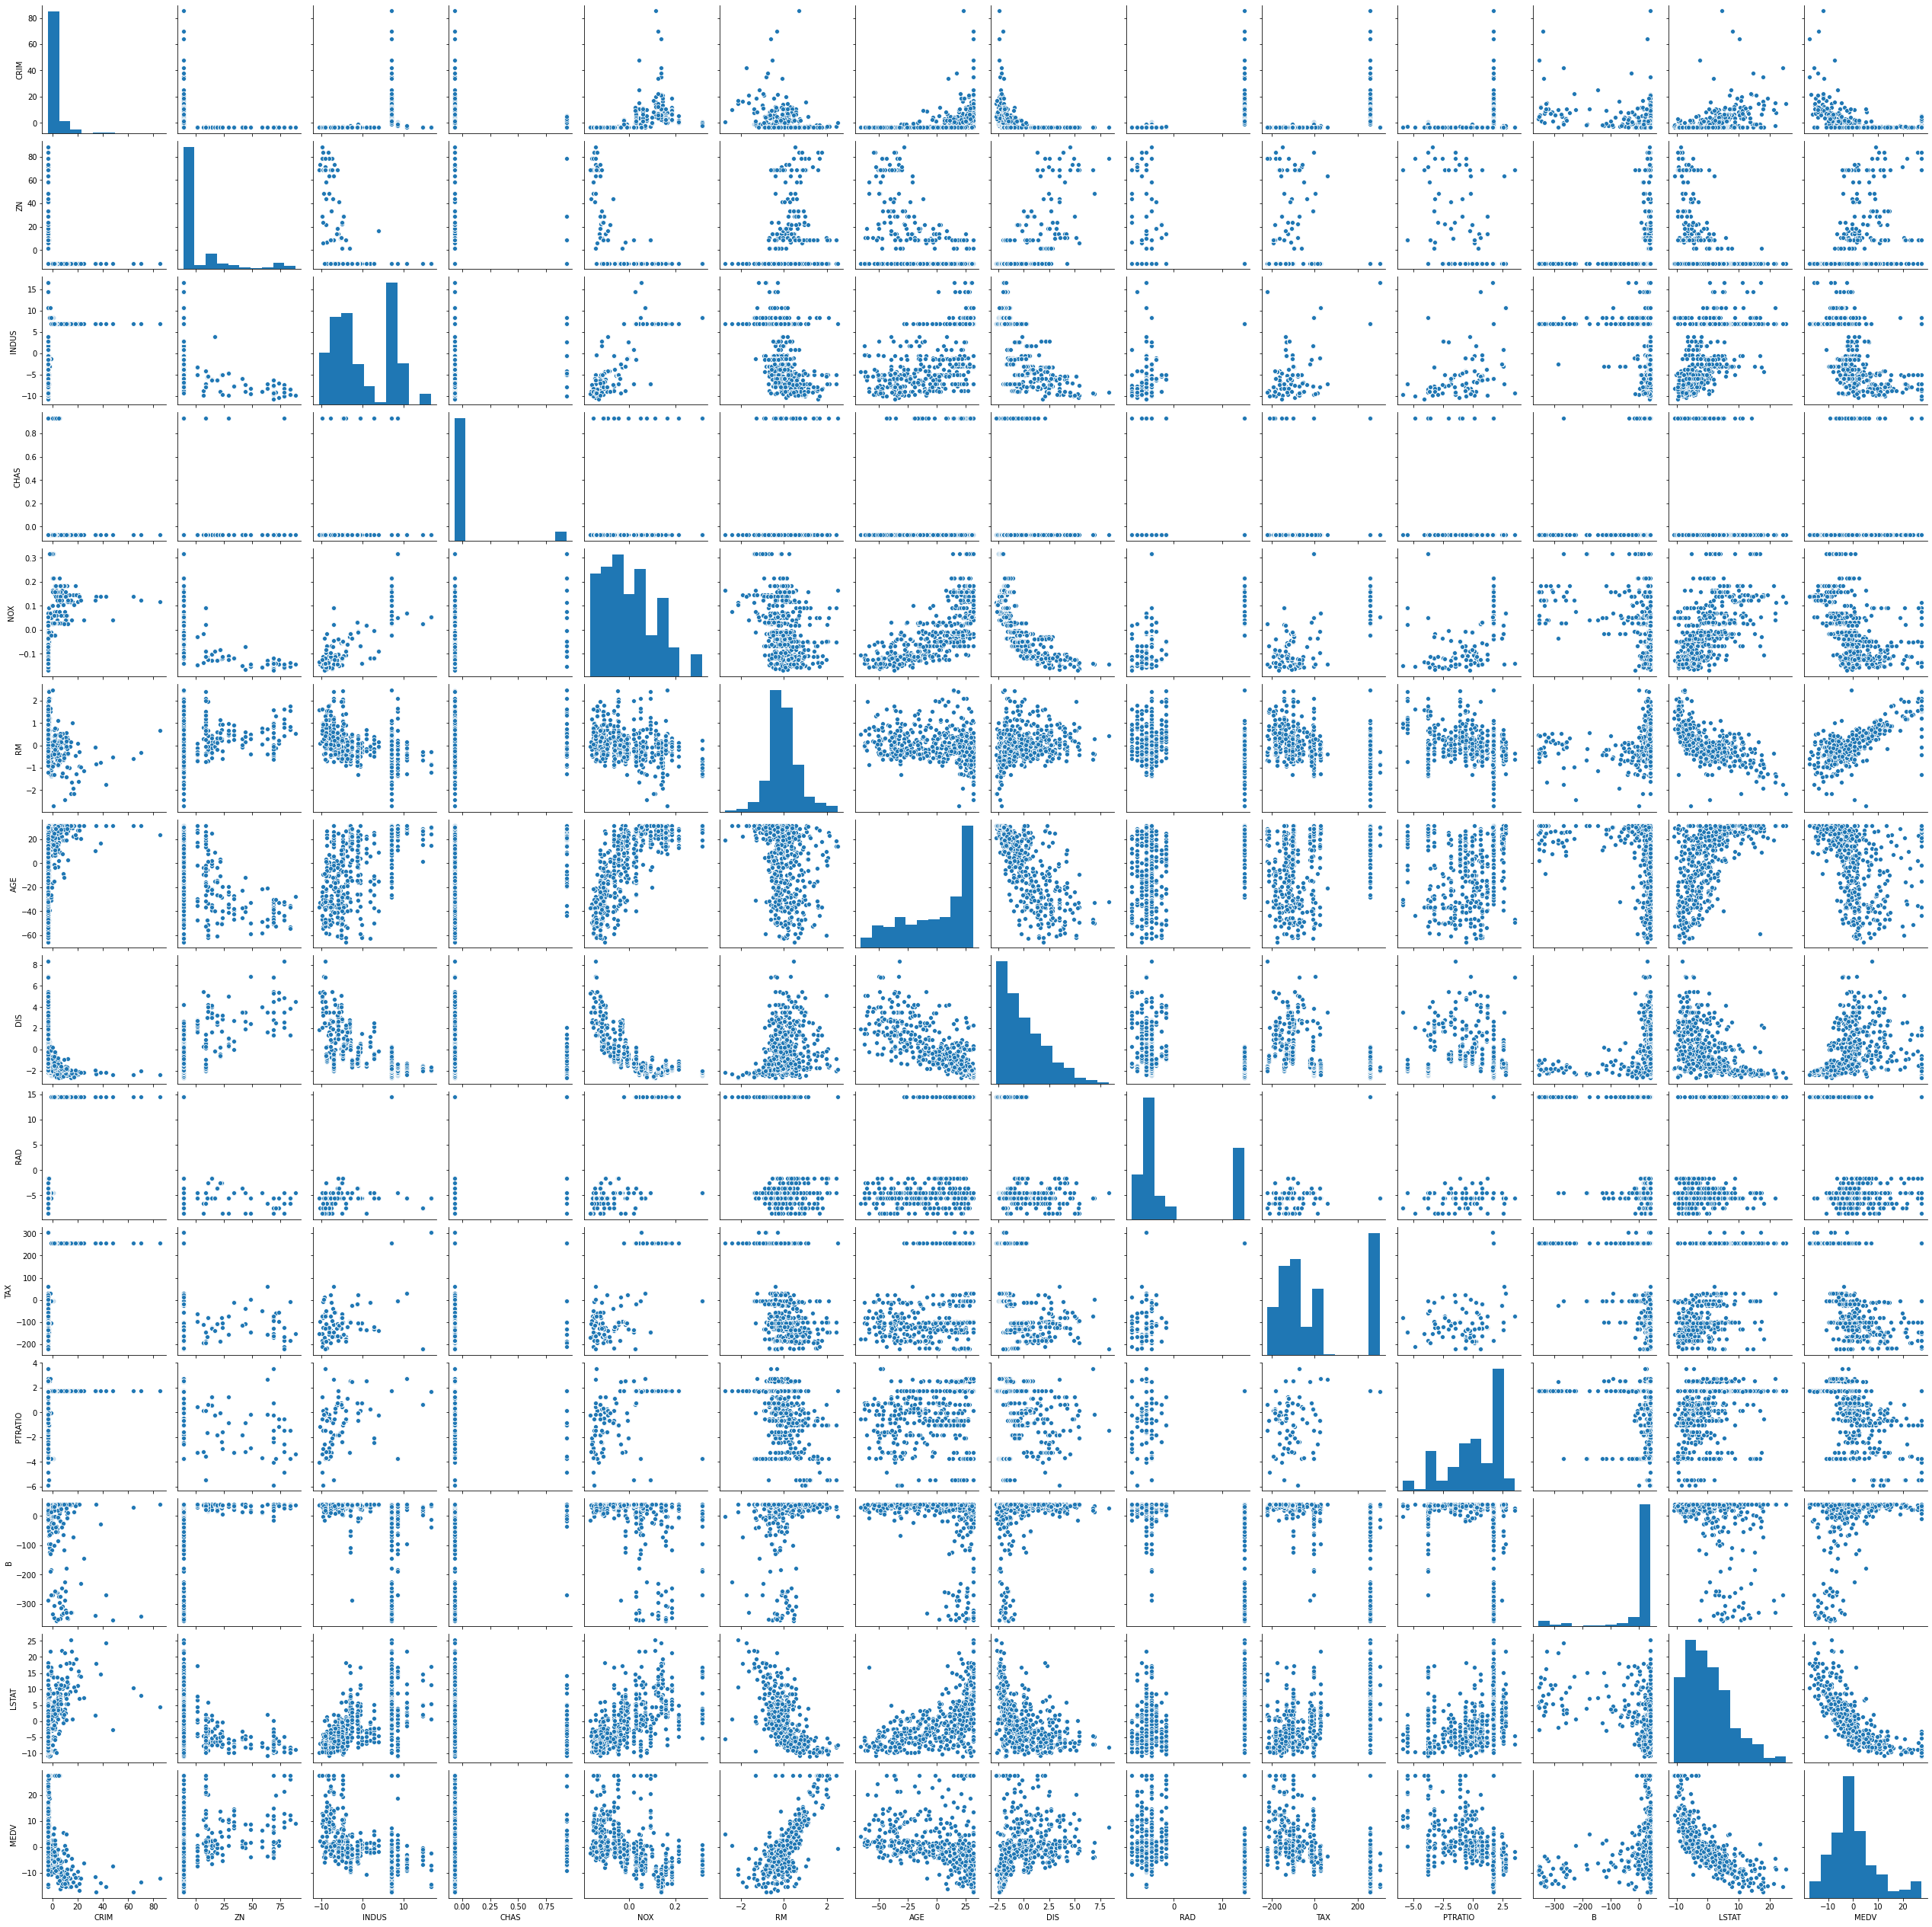

In [100]:
import seaborn_ml as sml
sml.pairplot(df)

In [ ]:
"""
Observation: The distribution of the data is not necessarily normal for all of the features
- StandarScalar that makes the data normalized may not be suitable

Was going to use the RobustScaler for scaling all fo the features
but the documentation for elastic net then recommended the StandardScalar
"""

In [213]:
import preprocessing_ml as preml
df_scaled = preml.scale_df(df,
            target_name=target_name,
            scaler = "StandardScaler",
            verbose = False)
df_scaled[target_name] = df[target_name]
df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1.467194
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.932806
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,12.167194
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,10.867194
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,13.667194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.132806
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-1.932806
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1.367194
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.532806


# ai) Elastic Net

In [162]:
import sklearn.linear_model as sklin

In [ ]:
sklin.ElasticNetCV

In [164]:
l1_ratio = 1
fit_intercept = False

model = sklin.ElasticNetCV(l1_ratio=l1_ratio,
                   fit_intercept=fit_intercept,)
model.fit(X,y)
model.score(X,y)

0.7024437179872695

In [165]:
model = sklin.LassoCV(fit_intercept = fit_intercept)
model.fit(X,y)
model.score(X,y)

0.7024437179872695

In [166]:
model = sklin.RidgeCV(fit_intercept=fit_intercept)
model.fit(X,y)
model.score(X,y)

0.7406002922227992

In [141]:
feature_names = pml.feature_names(X)

In [142]:
feature_names[np.argsort(np.abs(model.coef_))]

array(['AGE', 'INDUS', 'B', 'TAX', 'ZN', 'CRIM', 'RAD', 'LSTAT',
       'PTRATIO', 'DIS', 'CHAS', 'RM', 'NOX'], dtype='<U7')

# Adaptive Lasso

In [198]:
"""
Help with the implementation: 

https://gist.github.com/agramfort/1610922

"""

In [233]:
X,y = pml.X_y(df_scaled,target_name)
model_al = sklm.AdaptiveLasso(
    X,
    y,
    verbose = True
)

11.677712405676056
11.843012528758223
11.845589430052813
11.845485947761428
11.84548011611937
Final R^2 score: 0.7403002772527386


In [238]:
sklm.ranked_features(model,
                    feature_names=feature_names,
                    verbose = True)

feature_weights= [0.78838792 0.89625166 0.         0.67445319 1.802492   2.74394124
 0.         2.7969471  1.93136336 1.43924943 1.98746731 0.80659889
 3.72705821]
ordered_idx= [12  7  5 10  8  4  9  1 11  0  3  6  2]
ordered_features = ['LSTAT' 'DIS' 'RM' 'PTRATIO' 'RAD' 'NOX' 'TAX' 'ZN' 'B' 'CRIM' 'CHAS'
 'AGE' 'INDUS']


array(['LSTAT', 'DIS', 'RM', 'PTRATIO', 'RAD', 'NOX', 'TAX', 'ZN', 'B',
       'CRIM', 'CHAS', 'AGE', 'INDUS'], dtype='<U7')

In [237]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')